
--- Inflow Performance Relationship (IPR) Tool ---


Enter reservoir pressure, Pr (psi):  3000
Enter test bottom-hole pressure, Pwf_test (psi):  2200
Enter test flow rate at Pwf_test (STB/day):  280
Enter skin factor (S):  2
Enter drainage radius, re (ft):  660
Enter wellbore radius, rw (ft):  0.3



Pwf (psi) | Vogel (STB/day) | Fetkovich n=1 (STB/day)
-------------------------------------------------------
0          | 661.76            | 605.77
500        | 625.0             | 588.94
1000       | 558.82            | 538.46
1500       | 463.24            | 454.33
2000       | 338.24            | 336.54
2500       | 183.82            | 185.1
3000       | 0.0               | 0.0

--- Summary ---
Calculated PI (from test): 0.35 STB/day/psi
Adjusted PI with skin (S=2.0, re=660.0, rw=0.3): 0.28 STB/day/psi
Estimated q_max (Vogel): 661.76 STB/day
Estimated q_max (Fetkovich n=1): 605.77 STB/day


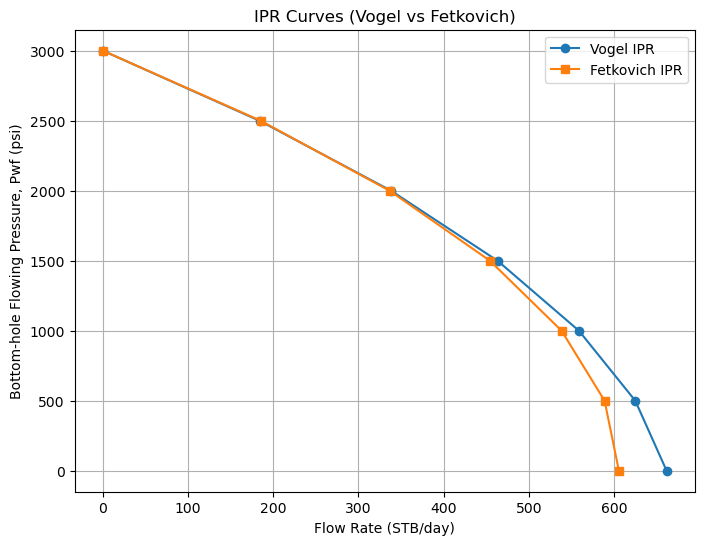

In [1]:
import matplotlib.pyplot as plt
import math

def calculate_pi(q_test, pr, pwf_test):
    """Productivity Index (PI) for a test point"""
    return q_test / (pr - pwf_test)

def vogel_ipr(qmax, pr, pwf):
    """Vogel IPR model for oil wells"""
    x = pwf / pr
    return qmax * (1 - 0.2 * x - 0.8 * x**2)

# Fetkovich with n = 1 (for saturated oil reservoir)
def fetkovich_ipr(qmax_fetk, pr, pwf):
    return qmax_fetk * (1 - (pwf / pr)**2)

#Improved PI correction with skin
def adjust_pi_for_skin(pi, skin, re, rw):
    return pi / (1 + skin / math.log(re / rw))

def ipr_comparison():
    print("\n--- Inflow Performance Relationship (IPR) Tool ---")
    
    pr = float(input("Enter reservoir pressure, Pr (psi): "))
    pwf_test = float(input("Enter test bottom-hole pressure, Pwf_test (psi): "))
    q_test = float(input("Enter test flow rate at Pwf_test (STB/day): "))
    skin = float(input("Enter skin factor (S): "))
    re = float(input("Enter drainage radius, re (ft): "))
    rw = float(input("Enter wellbore radius, rw (ft): "))

    # Calculating PI and adjust for skin
    pi = calculate_pi(q_test, pr, pwf_test)
    pi_eff = adjust_pi_for_skin(pi, skin, re, rw)

    # Calculating Vogel qmax
    x = pwf_test / pr
    q_max_vogel = q_test / (1 - 0.2 * x - 0.8 * x ** 2)

    # Calculating Fetkovich qmax (n=2)
    qmax_fetk = q_test / (1 - (pwf_test / pr) ** 2)

    print("\nPwf (psi) | Vogel (STB/day) | Fetkovich n=1 (STB/day)")
    print("-------------------------------------------------------")
    step = max(1, int(pr / 6))
    
    pwf_values = []
    vogel_rates = []
    fetkovich_rates = []

    for pwf in range(0, int(pr) + 1, step):
        q_vogel = vogel_ipr(q_max_vogel, pr, pwf)
        q_fetkovich = fetkovich_ipr(qmax_fetk, pr, pwf)
        
        pwf_values.append(pwf)
        vogel_rates.append(q_vogel)
        fetkovich_rates.append(q_fetkovich)
        
        print(f"{pwf:<10} | {round(q_vogel, 2):<17} | {round(q_fetkovich, 2)}")

    print("\n--- Summary ---")
    print(f"Calculated PI (from test): {round(pi, 2)} STB/day/psi")
    print(f"Adjusted PI with skin (S={skin}, re={re}, rw={rw}): {round(pi_eff, 2)} STB/day/psi")
    print(f"Estimated q_max (Vogel): {round(q_max_vogel, 2)} STB/day")
    print(f"Estimated q_max (Fetkovich n=1): {round(qmax_fetk, 2)} STB/day")

    # Plotting IPR curves
    plt.figure(figsize=(8,6))
    plt.plot(vogel_rates,pwf_values, marker='o', label="Vogel IPR")
    plt.plot(fetkovich_rates, pwf_values, marker='s', label="Fetkovich IPR")
    plt.title("IPR Curves (Vogel vs Fetkovich)")
    plt.ylabel("Bottom-hole Flowing Pressure, Pwf (psi)")
    plt.xlabel("Flow Rate (STB/day)")
    plt.legend()
    plt.grid(True)
    plt.show()


ipr_comparison()
